# File structure scaffloding

In [1]:
%pwd

u'/home/ubuntu/git/courses/deeplearning1/nbs'

In [2]:
import os, sys, shutil
import numpy as np
from glob import glob
current_dir = os.getcwd()
HOME_DIR = current_dir
SOURCE_DIR = current_dir + '/data/source'
DATA_DIR = current_dir + '/data/redux_from_scratch'

In [4]:
%rm -R $DATA_DIR
%mkdir -p $DATA_DIR

In [5]:
alias unzip unzip

In [6]:
%unzip -q $SOURCE_DIR/test.zip -d $DATA_DIR
%unzip -q $SOURCE_DIR/train.zip -d $DATA_DIR

In [7]:
%cd $DATA_DIR
%matplotlib inline

/home/ubuntu/git/courses/deeplearning1/nbs/data/redux_from_scratch


In [8]:
alias tree tree

In [9]:
%tree -d

.
|-- test
`-- train

2 directories


In [10]:
%mkdir valid
%mkdir results
%mkdir -p sample/train
%mkdir -p sample/valid
%mkdir -p sample/test
%mkdir -p sample/results
%mkdir -p test/unknown


In [11]:
%cd $DATA_DIR/train

/home/ubuntu/git/courses/deeplearning1/nbs/data/redux_from_scratch/train


In [12]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

shuffled = np.random.permutation(glob('*.jpg'))
# print(DATA_DIR + '/train/'+shuffled[0])
# img=mpimg.imread(DATA_DIR + '/train/'+shuffled[0])
# imgplot = plt.imshow(img)
# plt.show()

for i in range(2500): 
    #print(DATA_DIR + '/train/'+shuffled[i])
    shutil.move(DATA_DIR + '/train/'+shuffled[i], DATA_DIR + '/valid')
    
    
#shutil.move('$DATA_DIR/train', dst, copy_function=copy2)

In [13]:
shuffled = np.random.permutation(glob('*.jpg'))
for i in range(250): 
    #print(DATA_DIR + '/train/'+shuffled[i])
    shutil.move(DATA_DIR + '/train/'+shuffled[i], DATA_DIR + '/sample/train')
    

In [14]:
%cd $DATA_DIR/sample/train

/home/ubuntu/git/courses/deeplearning1/nbs/data/redux_from_scratch/sample/train


In [15]:
shuffled = np.random.permutation(glob('*.jpg'))
for i in range(25): 
    #print(DATA_DIR + '/train/'+shuffled[i])
    shutil.move(DATA_DIR + '/sample/train/'+shuffled[i], DATA_DIR + '/sample/valid')
    

/home/ubuntu/git/courses/deeplearning1/nbs/data/redux_from_scratch/train/cat.4162.jpg
/home/ubuntu/git/courses/deeplearning1/nbs/data/redux_from_scratch/train/cat.10775.jpg
/home/ubuntu/git/courses/deeplearning1/nbs/data/redux_from_scratch/train/cat.4067.jpg
/home/ubuntu/git/courses/deeplearning1/nbs/data/redux_from_scratch/train/cat.5754.jpg
/home/ubuntu/git/courses/deeplearning1/nbs/data/redux_from_scratch/train/dog.11882.jpg
/home/ubuntu/git/courses/deeplearning1/nbs/data/redux_from_scratch/train/cat.1701.jpg
/home/ubuntu/git/courses/deeplearning1/nbs/data/redux_from_scratch/train/cat.12300.jpg
/home/ubuntu/git/courses/deeplearning1/nbs/data/redux_from_scratch/train/dog.12379.jpg
/home/ubuntu/git/courses/deeplearning1/nbs/data/redux_from_scratch/train/cat.6791.jpg
/home/ubuntu/git/courses/deeplearning1/nbs/data/redux_from_scratch/train/cat.10610.jpg
/home/ubuntu/git/courses/deeplearning1/nbs/data/redux_from_scratch/train/dog.5869.jpg
/home/ubuntu/git/courses/deeplearning1/nbs/data/r

Move cats and dogs in separate dir

In [16]:
%cd $DATA_DIR/sample/train
%mkdir cats
%mkdir dogs
%mv cat.*.jpg cats/
%mv dog.*.jpg dogs/

%cd $DATA_DIR/sample/valid
%mkdir cats
%mkdir dogs
%mv cat.*.jpg cats/
%mv dog.*.jpg dogs/

%cd $DATA_DIR/valid
%mkdir cats
%mkdir dogs
%mv cat.*.jpg cats/
%mv dog.*.jpg dogs/

%cd $DATA_DIR/train
%mkdir cats
%mkdir dogs
%mv cat.*.jpg cats/
%mv dog.*.jpg dogs/

/home/ubuntu/git/courses/deeplearning1/nbs/data/redux_from_scratch/sample/train
/home/ubuntu/git/courses/deeplearning1/nbs/data/redux_from_scratch/sample/valid
/home/ubuntu/git/courses/deeplearning1/nbs/data/redux_from_scratch/valid
/home/ubuntu/git/courses/deeplearning1/nbs/data/redux_from_scratch/train


In [18]:
# Create single 'unknown' class for test set
%cd $DATA_DIR/test
%mv *.jpg unknown/

/home/ubuntu/git/courses/deeplearning1/nbs/data/redux_from_scratch/test


In [20]:
%cd $DATA_DIR
%tree -d

/home/ubuntu/git/courses/deeplearning1/nbs/data/redux_from_scratch
.
|-- results
|-- sample
|   |-- results
|   |-- test
|   |-- train
|   |   |-- cats
|   |   `-- dogs
|   `-- valid
|       |-- cats
|       `-- dogs
|-- test
|   `-- unknown
|-- train
|   |-- cats
|   `-- dogs
`-- valid
    |-- cats
    `-- dogs

18 directories


Todo

* train model using Vgg lib
* generate predictions
* debug predictions
* submit

# Train model

TODO : start kernel below as files are already structured

In [3]:
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.layers.core import Flatten, Dense, Dropout, Lambda
from keras.utils.data_utils import get_file
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import  Adam



Using Theano backend.
Using gpu device 0: Tesla K80 (CNMeM is disabled, cuDNN 5103)
/home/ubuntu/anaconda2/lib/python2.7/site-packages/theano/sandbox/cuda/__init__.py:600: UserWarning: Your cuDNN version is more recent than the one Theano officially supports. If you see any problems, try updating Theano or downgrading cuDNN to version 5.
  warnings.warn(warn)


## Create model layers structure

In [4]:
def vgg_preprocess(x):
    #substract the mean RGB value, that was computed previously and hardcoded below
    #TODO : understand the line below
    x = x - np.array([123.68, 116.779, 103.939], dtype=np.float32).reshape(3,1,1)
    return x[:, ::-1]
    

model = Sequential()
# FROM THE DOC : 
# the first layer in a  Sequential model (and only the first, because 
# following layers can do automatic shape inference) needs to receive 
# information about its input shape
model.add(Lambda(vgg_preprocess, input_shape=(3, 224, 224), output_shape=(3, 224, 224)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(64, 3, 3, activation = 'relu'))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(64, 3, 3, activation = 'relu'))

model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, 3, 3, activation = 'relu'))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, 3, 3, activation = 'relu'))

model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, 3, 3, activation = 'relu'))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, 3, 3, activation = 'relu'))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, 3, 3, activation = 'relu'))

model.add(MaxPooling2D((2,2), strides=(2,2)))


model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, 3, 3, activation = 'relu'))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, 3, 3, activation = 'relu'))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, 3, 3, activation = 'relu'))

model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, 3, 3, activation = 'relu'))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, 3, 3, activation = 'relu'))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, 3, 3, activation = 'relu'))

model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(Flatten())

model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1000, activation='softmax'))



## Load weights into model

In [5]:
filename = 'vgg16.h5'
model.load_weights(get_file(filename, 'http://files.fast.ai/models/' + filename, cache_subdir='models'))


## Feed training data to the model

In [6]:
# root_dir = DATA_DIR + '/sample'
root_dir = DATA_DIR
batch_size = 64

train_gen = ImageDataGenerator()
train_generator = train_gen.flow_from_directory(root_dir+ '/train', target_size=(224,224), batch_size=batch_size)

valid_gen = ImageDataGenerator()
valid_generator = valid_gen.flow_from_directory(root_dir+ '/valid', target_size=(224,224), batch_size=batch_size * 2)

# TODO : why not same batch_size ?

Found 22250 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


In [7]:
#Finetune model, ie change last layer to 2 classes (dogs/cat)
model.pop()
for layer in model.layers: layer.trainable=False
model.add(Dense(train_generator.nb_class, activation='softmax'))

model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

classes = list(iter(train_generator.class_indices))

for c in train_generator.class_indices:
    classes[train_generator.class_indices[c]] = c
model.classes = classes

In [9]:
model.classes

['cats', 'dogs']

In [8]:
model.fit_generator(train_generator, validation_data = valid_generator, nb_epoch = 1, samples_per_epoch = train_generator.nb_sample, nb_val_samples=valid_generator.nb_sample)

Epoch 1/1
22250/22250 [==============================] - 655s - loss: 0.1232 - acc: 0.9683 - val_loss: 0.0486 - val_acc: 0.9816


Todo : 

- generate predictions
- validate predictions

In [9]:
probs = model.predict_generator(valid_generator, valid_generator.nb_sample)
our_predictions = probs[:,0]
our_labels = np.round(1-our_predictions)

In [103]:
from IPython.display import Image

expected_labels = valid_generator.classes
selection = np.where(our_labels==expected_labels)[0]
correct_image = valid_generator.filenames[selection[1]]
Image(root_dir+ '/valid/' + correct_image)
len(selection)

1245

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(expected_labels, our_labels)

## Generate predictions

In [47]:
test_gen = ImageDataGenerator()
test_generator = train_gen.flow_from_directory(root_dir+ '/test', target_size=(224,224), batch_size=batch_size)
prediction_filenames = test_generator.filenames
prediction_labels = model.predict_generator(test_generator, test_generator.nb_sample)


Found 12500 images belonging to 1 classes.


In [87]:
isdog = prediction_labels[:,1]
isdog = isdog.clip(min=0.01, max=0.99)

In [94]:
ids = np.array([int(f[8:f.find('.')]) for f in prediction_filenames])
subm = np.stack([ids, isdog], axis=1)

In [95]:
%cd $DATA_DIR
np.savetxt('submission1.csv', subm, fmt='%d, %.5f', header='id,label', comments='')

/home/ubuntu/git/courses/deeplearning1/nbs/data/redux_from_scratch


In [96]:
from IPython.display import FileLink
%cd $HOME_DIR
FileLink('data/redux_from_scratch/submission1.csv')

/home/ubuntu/git/courses/deeplearning1/nbs


/home/ubuntu/git/courses/deeplearning1/nbs/data/redux_from_scratch/submission1.csv

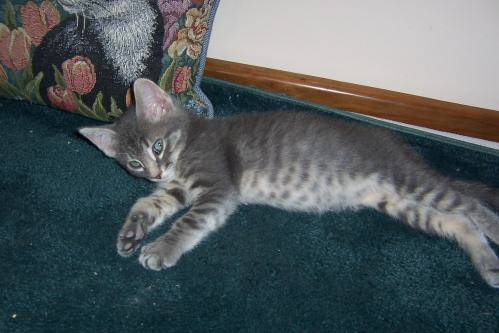

In [86]:
Image(root_dir+ '/test/unknown/8553.jpg') 

Il doit y avoir une erreur quelque part car le score Kaggle est très faible pour cette solution